In [1]:
%%capture
!pip install selenium
!pip install beautifulsoup4
!mkdir glass

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[открытый датасет](https://www.kaggle.com/code/yashvi/data-analyst-jobs-visualization/notebook).

## [Web scarping Glassdoor](https://drive.google.com/file/d/1SZXSehexodrohmRtMfWNQrRqUTOWcDgn/view?usp=sharing)

In [55]:
glassdoor_job = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_collection_and_marking/Модуль 1. Введение в сбор данных/analyst_job.csv')

In [23]:
glassdoor_job

,title,location,employment_type,level,category,salary_min,salary_max,salary_type,description,requirements
0,Credit Risk Analyst – Leading Renewable Energy...,Central,Full Time,Professional,"Risk Management, Banking and Finance",NaN,NaN,NaN,Roles & Responsibilities\n• 6 years of relevan...,Requirements\n**Apply here**\nhttps://www.blue...
1,"Financial Analyst, Google Customer Solutions -...",South,Full Time,Executive,Banking and Finance,"$6,600","to$13,200",Monthly,Roles & Responsibilities\nCompany overview:\nG...,Requirements\nMinimum qualifications:\n- BA/BS...
2,Senior Business Analyst,Central,Permanent,Professional,Information Technology,NaN,NaN,NaN,Roles & Responsibilities\nUnique Requirements\...,"Requirements\nDegree in Information Systems, B..."
3,Senior Financial Analyst (Pharmaceutical),Islandwide,Permanent,Senior Executive,Accounting / Auditing / Taxation,NaN,NaN,NaN,Roles & Responsibilities\nWork for a Fortune 5...,Requirements\nThe successful candidate will be...
4,System Analyst (Java) (JD#4804),East,"Contract, Full Time","Executive, Senior Executive",Entertainment,"$4,000","to$5,000",Monthly,Roles & Responsibilities\nJob Summary\nAn exci...,Requirements\nMandatory Skill-set\nDegree in C...
...,...,...,...,...,...,...,...,...,...,...
1143,Senior Software Engineer - People Initiatives,West,"Permanent, Full Time",Professional,"Engineering, Human Resources , Information Tec...","$8,000","to$11,000",Monthly,Roles & Responsibilities\nAs one of the fastes...,Requirements\nAttitudes & Behaviours Critical ...
1144,Salesforce Senior Consultant,Central,"Permanent, Full Time",Middle Management,Consulting,"$5,000","to$6,000",Monthly,Roles & Responsibilities\nSummary:\nCloudGo is...,Requirements\nRequirements:\nMinimum 5 years o...
1145,CRM Consultant,East,Contract,Senior Executive,Information Technology,"$7,000","to$8,500",Monthly,Roles & Responsibilities\nAble to understand k...,Requirements\nAble to handle diverse business ...
1146,"GSAM, Asia Pacific ex Japan Client Business - ...",Central,"Permanent, Full Time",Executive,Banking and Finance,"$5,000","to$10,000",Monthly,Roles & Responsibilities\nYOUR IMPACT\nWe are ...,Requirements\nSKILLS & EXPERIENCE WE’RE LOOKIN...


In [56]:
kaggle_job = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_collection_and_marking/Модуль 1. Введение в сбор данных/DataAnalyst.csv')

In [25]:
kaggle_job

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [58]:
df = kaggle_job.copy()
column_mapping = {
    'Salary Estimate': 'Salary Estimate'
}

df_copy = df.rename(columns=column_mapping).copy()

df_copy['Salary Estimate'] = df_copy['Salary Estimate'].str.replace('K', '000').str.replace(' \(Glassdoor est.\)', '')

df_copy[['Salary From', 'Salary To']] = df_copy['Salary Estimate'].str.split('-', expand=True)

df_copy['Salary From'] = pd.to_numeric(df_copy['Salary From'].str.replace('$', ''), errors='coerce')
df_copy['Salary To'] = pd.to_numeric(df_copy['Salary To'].str.replace('$', ''), errors='coerce')

df_copy

<ipython-input-58-6ab3b48550d6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['Salary Estimate'] = df_copy['Salary Estimate'].str.replace('K', '000').str.replace(' \(Glassdoor est.\)', '')
<ipython-input-58-6ab3b48550d6>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Salary From'] = pd.to_numeric(df_copy['Salary From'].str.replace('$', ''), errors='coerce')
<ipython-input-58-6ab3b48550d6>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Salary To'] = pd.to_numeric(df_copy['Salary To'].str.replace('$', ''), errors='coerce')


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary From,Salary To
0,0,"Data Analyst, Center on Immigration and Justic...",$37000-$66000,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000.0,66000
1,1,Quality Data Analyst,$37000-$66000,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37000.0,66000
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37000-$66000,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37000.0,66000
3,3,Data Analyst,$37000-$66000,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37000.0,66000
4,4,Reporting Data Analyst,$37000-$66000,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78000-$104000,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,78000.0,104000
2249,2249,Senior Data Analyst (Corporate Audit),$78000-$104000,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,78000.0,104000
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78000-$104000,"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,78000.0,104000
2251,2251,"Data Analyst 3, Customer Experience",$78000-$104000,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,78000.0,104000


In [59]:
columns_to_drop = ['Unnamed: 0', 'Salary Estimate', 'Headquarters', 'Size', 'Founded',
                   'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Easy Apply', 'Rating', 'Competitors']

df_copy = df_copy.drop(columns=columns_to_drop)

In [60]:
df_1 = df_copy.copy()

In [61]:
df_2 = glassdoor_job.copy()
df_2['salary_min'] = pd.to_numeric(df_2['salary_min'].str.replace('[^\d.]', '', regex=True), errors='coerce')
df_2['salary_max'] = pd.to_numeric(df_2['salary_max'].str.replace('[^\d.]', '', regex=True), errors='coerce')

df_2['salary_min'] = df_2['salary_min'].astype(str)
df_2['salary_max'] = df_2['salary_max'].astype(str)

df_2['salary_min'] = df_2['salary_min'].str.replace('to', '').str.strip('$')
df_2['salary_max'] = df_2['salary_max'].str.replace('to', '').str.strip('$')

df_2['salary_min'] = pd.to_numeric(df_2['salary_min'], errors='coerce')
df_2['salary_max'] = pd.to_numeric(df_2['salary_max'], errors='coerce')

monthly_mask = df_2['salary_type'] == 'Monthly'
df_2.loc[monthly_mask, ['salary_min', 'salary_max']] *= 12

In [62]:
df_2['salary_max'].value_counts

<bound method IndexOpsMixin.value_counts of 0            NaN
1       158400.0
2            NaN
3            NaN
4        60000.0
          ...   
1143    132000.0
1144     72000.0
1145    102000.0
1146    120000.0
1147     54000.0
Name: salary_max, Length: 1148, dtype: float64>

In [63]:
column_mapping = {
    'title': 'Job Title',
    'location': 'Location',
    'salary_min': 'Salary From',
    'salary_max': 'Salary To',
    'description': 'Job Description',
}

df_2 = df_2.rename(columns=column_mapping)

In [64]:
columns_to_drop = ['employment_type', 'level', 'category', 'salary_type', 'requirements']

In [65]:
df_2.drop(columns=columns_to_drop, inplace=True)

In [66]:
df_2

,Job Title,Location,Salary From,Salary To,Job Description
0,Credit Risk Analyst – Leading Renewable Energy...,Central,NaN,NaN,Roles & Responsibilities\n• 6 years of relevan...
1,"Financial Analyst, Google Customer Solutions -...",South,79200.0,158400.0,Roles & Responsibilities\nCompany overview:\nG...
2,Senior Business Analyst,Central,NaN,NaN,Roles & Responsibilities\nUnique Requirements\...
3,Senior Financial Analyst (Pharmaceutical),Islandwide,NaN,NaN,Roles & Responsibilities\nWork for a Fortune 5...
4,System Analyst (Java) (JD#4804),East,48000.0,60000.0,Roles & Responsibilities\nJob Summary\nAn exci...
...,...,...,...,...,...
1143,Senior Software Engineer - People Initiatives,West,96000.0,132000.0,Roles & Responsibilities\nAs one of the fastes...
1144,Salesforce Senior Consultant,Central,60000.0,72000.0,Roles & Responsibilities\nSummary:\nCloudGo is...
1145,CRM Consultant,East,84000.0,102000.0,Roles & Responsibilities\nAble to understand k...
1146,"GSAM, Asia Pacific ex Japan Client Business - ...",Central,60000.0,120000.0,Roles & Responsibilities\nYOUR IMPACT\nWe are ...


In [71]:
df_1.drop(columns='Company Name', inplace=True)

In [72]:
df_1

,Job Title,Job Description,Location,Salary From,Salary To
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY",37000.0,66000
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,"New York, NY",37000.0,66000
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY",37000.0,66000
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,"New York, NY",37000.0,66000
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,"New York, NY",37000.0,66000
...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,Maintains systems to protect data from unautho...,"Denver, CO",78000.0,104000
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,"Centennial, CO",78000.0,104000
2250,"Technical Business Analyst (SQL, Data analytic...","Title: Technical Business Analyst (SQL, Data a...","Denver, CO",78000.0,104000
2251,"Data Analyst 3, Customer Experience",Summary\n\nResponsible for working cross-funct...,"Centennial, CO",78000.0,104000


# EDA

## concat df

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [74]:
df = pd.concat([df_1, df_2], axis=1)

In [76]:
df_1.columns

Index(['Job Title', 'Job Description', 'Location', 'Salary From', 'Salary To'], dtype='object')

In [77]:
df_2.columns

Index(['Job Title', 'Location', 'Salary From', 'Salary To', 'Job Description'], dtype='object')

In [98]:
df = pd.concat([df_1, df_2[['Job Title', 'Location', 'Salary From', 'Salary To', 'Job Description']]], ignore_index=True)

In [99]:
df

,Job Title,Job Description,Location,Salary From,Salary To
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY",37000.0,66000.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,"New York, NY",37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY",37000.0,66000.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,"New York, NY",37000.0,66000.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,"New York, NY",37000.0,66000.0
...,...,...,...,...,...
3396,Senior Software Engineer - People Initiatives,Roles & Responsibilities\nAs one of the fastes...,West,96000.0,132000.0
3397,Salesforce Senior Consultant,Roles & Responsibilities\nSummary:\nCloudGo is...,Central,60000.0,72000.0
3398,CRM Consultant,Roles & Responsibilities\nAble to understand k...,East,84000.0,102000.0
3399,"GSAM, Asia Pacific ex Japan Client Business - ...",Roles & Responsibilities\nYOUR IMPACT\nWe are ...,Central,60000.0,120000.0


In [100]:
df.head()

,Job Title,Job Description,Location,Salary From,Salary To
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY",37000.0,66000.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,"New York, NY",37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY",37000.0,66000.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,"New York, NY",37000.0,66000.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,"New York, NY",37000.0,66000.0


In [81]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [101]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Salary From,104,3.1
Salary To,103,3.0


In [102]:
df['Job Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Data Analyst, Center on Immigration and Justic...
1                                    Quality Data Analyst
2       Senior Data Analyst, Insights & Analytics Team...
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
3396        Senior Software Engineer - People Initiatives
3397                         Salesforce Senior Consultant
3398                                       CRM Consultant
3399    GSAM, Asia Pacific ex Japan Client Business - ...
3400               Analyst Programmer(Salesforce.com;CPQ)
Name: Job Title, Length: 3401, dtype: object>

In [88]:
df['Job Description'].value_counts

<bound method DataFrame.value_counts of                                         Job Description  \
0     Are you eager to roll up your sleeves and harn...   
1     Overview\n\nProvides analytical and technical ...   
2     We’re looking for a Senior Data Analyst who ha...   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...   
...                                                 ...   
2248  Maintains systems to protect data from unautho...   
2249  Position:\nSenior Data Analyst (Corporate Audi...   
2250  Title: Technical Business Analyst (SQL, Data a...   
2251  Summary\n\nResponsible for working cross-funct...   
2252  You.\n\nYou bring your body, mind, heart and s...   

                                        Job Description  
0     Roles & Responsibilities\n• 6 years of relevan...  
1     Roles & Responsibilities\nCompany overview:\nG...  
2     Roles & Responsibilities\nUnique Requirements\...  
3     Roles & Respo

In [91]:
df['Location'].value_counts

<bound method DataFrame.value_counts of             Location    Location
0       New York, NY     Central
1       New York, NY       South
2       New York, NY     Central
3       New York, NY  Islandwide
4       New York, NY        East
...              ...         ...
2248      Denver, CO         NaN
2249  Centennial, CO         NaN
2250      Denver, CO         NaN
2251  Centennial, CO         NaN
2252  Broomfield, CO         NaN

[2253 rows x 2 columns]>

In [103]:
df=df.replace(-1,np.nan)
df=df.replace(-1.0,np.nan)
df=df.replace('-1',np.nan)

In [104]:
df

,Job Title,Job Description,Location,Salary From,Salary To
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY",37000.0,66000.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,"New York, NY",37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY",37000.0,66000.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,"New York, NY",37000.0,66000.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,"New York, NY",37000.0,66000.0
...,...,...,...,...,...
3396,Senior Software Engineer - People Initiatives,Roles & Responsibilities\nAs one of the fastes...,West,96000.0,132000.0
3397,Salesforce Senior Consultant,Roles & Responsibilities\nSummary:\nCloudGo is...,Central,60000.0,72000.0
3398,CRM Consultant,Roles & Responsibilities\nAble to understand k...,East,84000.0,102000.0
3399,"GSAM, Asia Pacific ex Japan Client Business - ...",Roles & Responsibilities\nYOUR IMPACT\nWe are ...,Central,60000.0,120000.0


In [105]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Salary From,104,3.1
Salary To,103,3.0


In [106]:
df.dropna(inplace=True)

In [107]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [108]:
df

,Job Title,Job Description,Location,Salary From,Salary To
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,"New York, NY",37000.0,66000.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,"New York, NY",37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,"New York, NY",37000.0,66000.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,"New York, NY",37000.0,66000.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,"New York, NY",37000.0,66000.0
...,...,...,...,...,...
3396,Senior Software Engineer - People Initiatives,Roles & Responsibilities\nAs one of the fastes...,West,96000.0,132000.0
3397,Salesforce Senior Consultant,Roles & Responsibilities\nSummary:\nCloudGo is...,Central,60000.0,72000.0
3398,CRM Consultant,Roles & Responsibilities\nAble to understand k...,East,84000.0,102000.0
3399,"GSAM, Asia Pacific ex Japan Client Business - ...",Roles & Responsibilities\nYOUR IMPACT\nWe are ...,Central,60000.0,120000.0


# Salary Distribution of Data Analyst

<ipython-input-109-98585a5d0e28>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Salary From'], color="b", ax=axes[0])
<ipython-input-109-98585a5d0e28>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Salary To'], color="r",ax=axes[1])


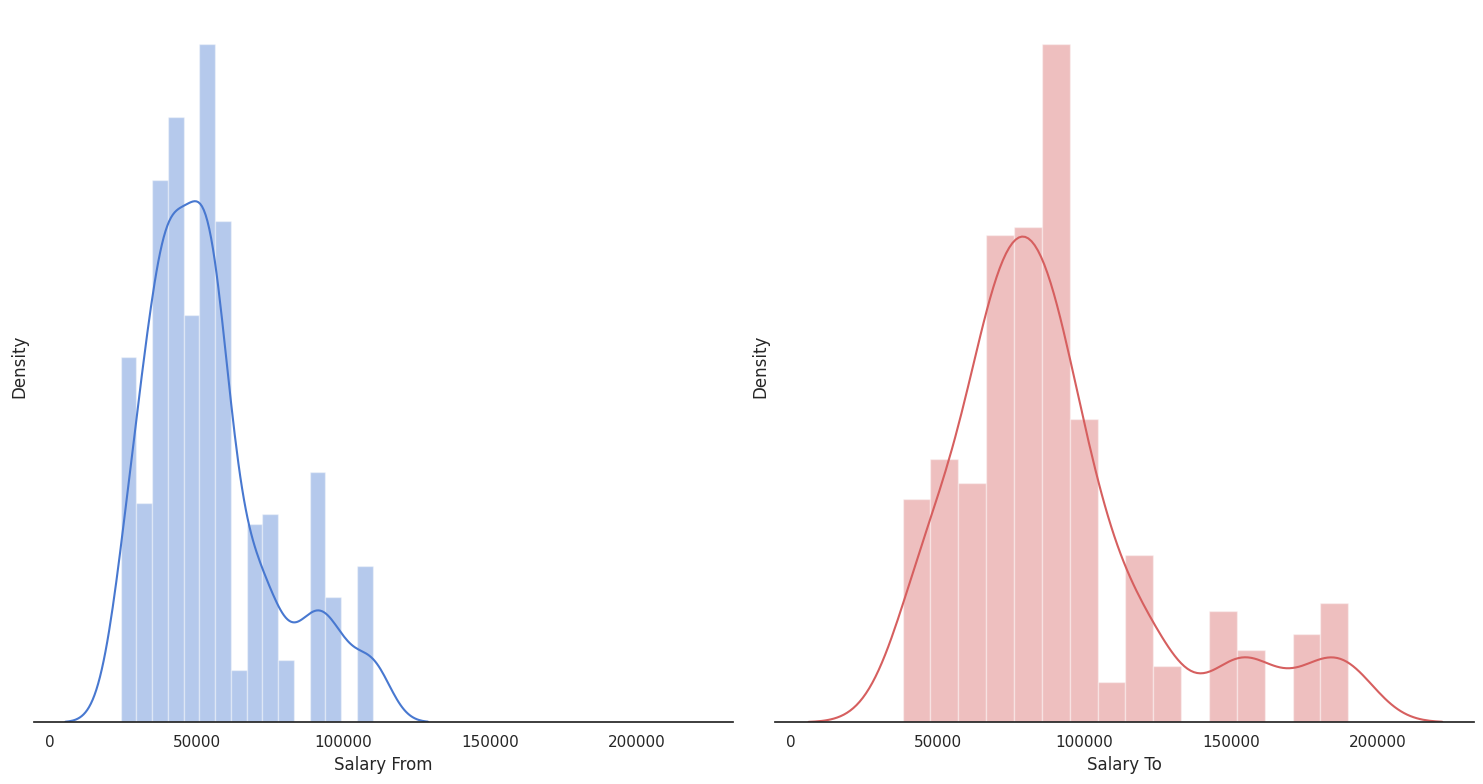

In [109]:
data_analyst = df[df['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

sns.distplot(data_analyst['Salary From'], color="b", ax=axes[0])

sns.distplot(data_analyst['Salary To'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# Top 20 cities with their minimum and maximum salaries

In [125]:
data=df.groupby('Location')[['Salary To','Salary From']].mean().sort_values(['Salary To','Salary From'],ascending=False).head(20)

In [126]:
fig = go.Figure()

fig.add_trace(go.Bar(x=data.index,y=data['Salary From'],name='Minimum salary'))
fig.add_trace(go.Bar(x=data.index,y=data['Salary To'],name='Maximum Salary'))

fig.update_layout(title='Топ-20 городов с их минимальной и максимальной зарплатой',barmode='stack')

fig.show()

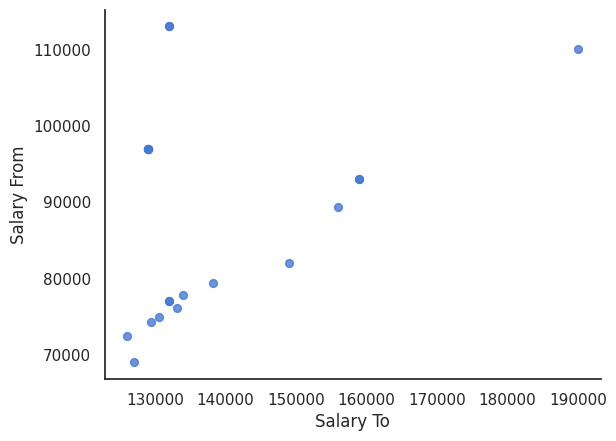

In [117]:
data.plot(kind='scatter', x='Salary To', y='Salary From', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

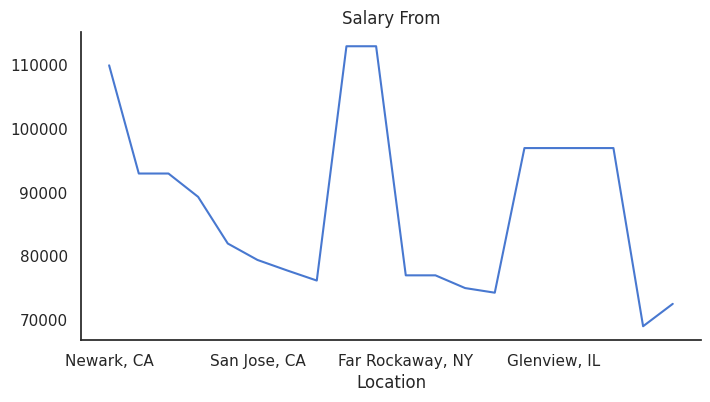

In [115]:
data['Salary From'].plot(kind='line', figsize=(8, 4), title='Salary From')
plt.gca().spines[['top', 'right']].set_visible(False)

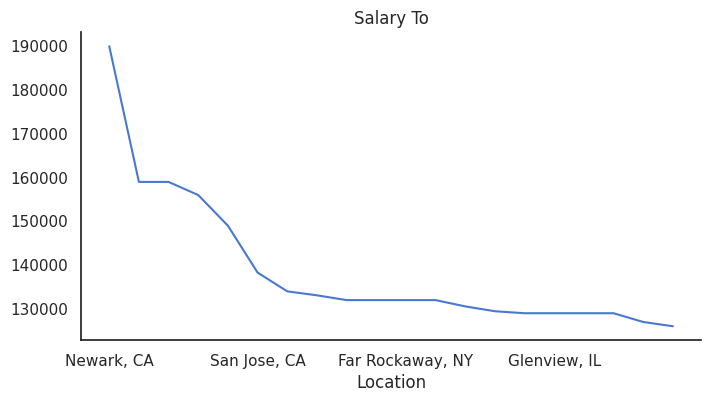

In [116]:
data['Salary To'].plot(kind='line', figsize=(8, 4), title='Salary To')
plt.gca().spines[['top', 'right']].set_visible(False)

# Top 20 Roles with their minimum and maximum salaries

In [127]:
data=df.groupby('Job Title')[['Salary To','Salary From']].mean().sort_values(['Salary To','Salary From'],ascending=False).head(20)

In [128]:
data

,Salary To,Salary From
Job Title,,
Senior Business Systems Analyst,900000.0,600000.0
L2 Support Analyst,759000.0,60000.0
"Finance Manager, Google Pay - Singapore",330000.0,165000.0
"Head, Strategy & Sales Performance",300000.0,180000.0
research analyst,264000.0,192000.0
Corporate & Investment Bank Summer Associate,252000.0,168000.0
Senior Business Process Analyst,240000.0,120000.0
"VP, Senior Data Scientist, Regional Consumer Banking Operations, Technology & Operations (18000449)",224400.0,124800.0
Technical Leader,216000.0,144000.0


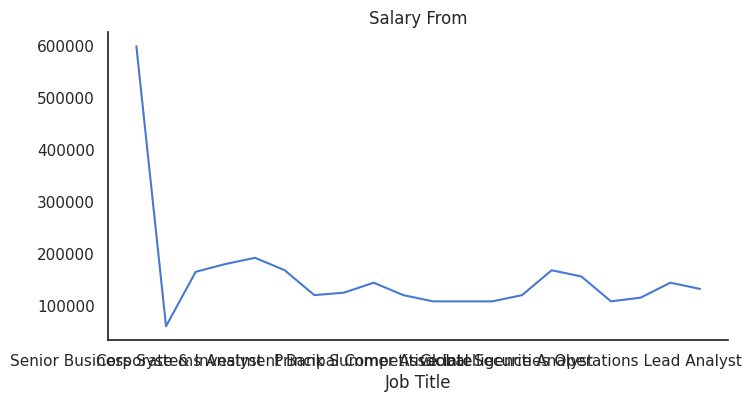

In [121]:
data['Salary From'].plot(kind='line', figsize=(8, 4), title='Salary From')
plt.gca().spines[['top', 'right']].set_visible(False)

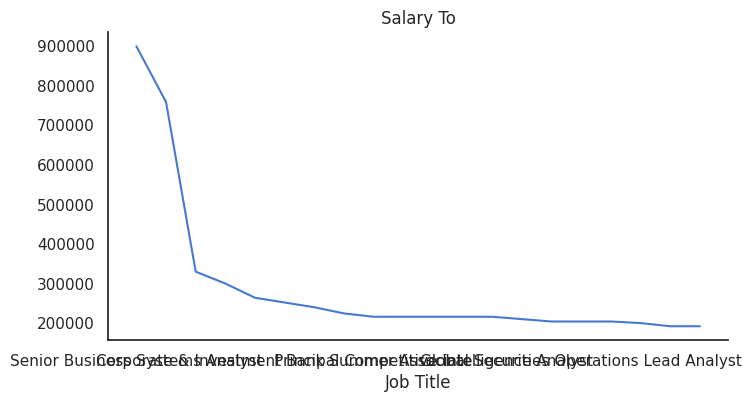

In [120]:
data['Salary To'].plot(kind='line', figsize=(8, 4), title='Salary To')
plt.gca().spines[['top', 'right']].set_visible(False)

In [123]:
fig = go.Figure()

fig.add_trace(go.Bar(x=data.index,y=data['Salary From'],name='Minimum salary'))
fig.add_trace(go.Bar(x=data.index,y=data['Salary To'],name='Maximum Salary'))

fig.update_layout(title='Top 20 Roles with their minimum and maximum salaries',barmode='stack')

fig.show()

# Word Cloud of job Title

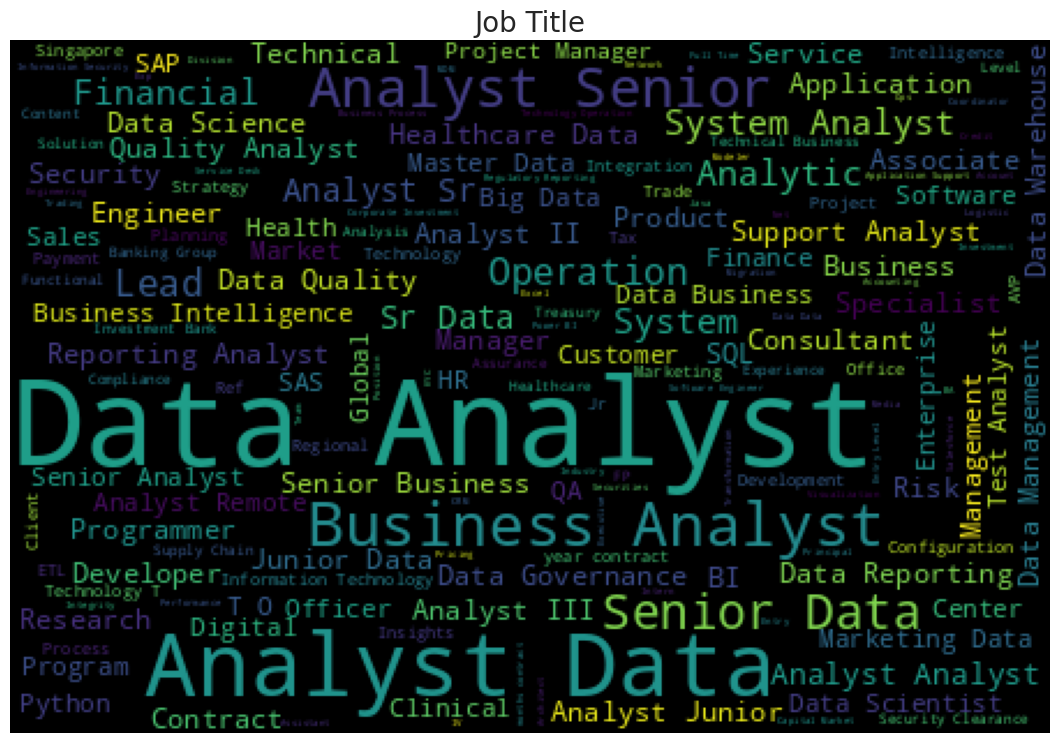

In [130]:
job_title=df['Job Title'][~pd.isnull(df['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Возможные применения этих данных в контексте машинного обучения

Данные о вакансиях, такие как те, которые вы предоставили, могут быть полезными для задач машинного обучения в различных областях. Вот несколько возможных применений этих данных в контексте машинного обучения:

1. **Прогнозирование зарплаты:** Можно использовать данные о зарплате, а также другие параметры, такие как должность, местоположение и описание работы, для построения модели прогнозирования зарплат. Это может быть полезно как для кандидатов, так и для работодателей.

2. **Классификация вакансий:** Можно использовать информацию о должности, местоположении и описании работы для классификации вакансий по отраслям, секторам, уровню сложности и т.д. Это помогает структурировать и категоризировать данные.

3. **Анализ требований к работе:** Модели машинного обучения могут анализировать требования к работе из описания вакансии. Это может включать в себя извлечение ключевых навыков, образования, опыта работы и т.д.

4. **Определение востребованных навыков:** Можно использовать данные о вакансиях для определения наиболее востребованных навыков в конкретной отрасли или локации. Это полезно для студентов и специалистов, которые могут использовать эту информацию для обучения.

5. **Кластеризация компаний:** Используя информацию о компаниях, можно провести кластеризацию компаний по различным критериям, таким как размер, отрасль, местоположение и др. Это может быть полезно для анализа бизнес-ландшафта.

6. **Предсказание локаций вакансий:** Можно разработать модель для предсказания местоположения вакансии на основе других параметров, таких как название компании, отрасль и тип собственности.

Важно подчеркнуть, что успешное применение машинного обучения зависит от качества данных, исследования задачи и выбора подходящих алгоритмов.